# Collage

In [4]:
import cv2
import random
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def showCollage(img,resize=True,showcv2=True):
    showimg = np.copy(img)
    if resize:
        width = 1600
        showimg = cv2.resize(img,(width,int((width/img.shape[1])*img.shape[0])))
        #showimg = cv2.resize(showimg,(1080,720))
    if showcv2:    
        cv2.imshow("img",showimg)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [ ]:
img1 =cv2.resize(cv2.imread("img1.jpeg"),(500,500))
img2 =cv2.resize(cv2.imread("img2.jpeg"),(500,500))

In [ ]:
combine = cv2.vconcat([img1,img2])
combine = cv2.hconcat([
    combine,cv2.resize(img1,(500,1000))])
cv2.imwrite('combined.jpg',combine)

In [ ]:
img1 = cv2.imread("img1.jpeg")
img2 = cv2.imread("img2.jpeg")
print(img1.shape)
print(img2.shape)

In [ ]:
height = 500
img1 = cv2.resize(img1,(int((height/img1.shape[0])*img1.shape[1]),height))
img2 = cv2.resize(img2,(int((height/img2.shape[0])*img2.shape[1]),height))
print(img1.shape)
print(img2.shape)
collage = cv2.hconcat([img1,img2])

In [ ]:
cv2.imshow("collage",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
collage_width = 1920*3
collage_height = 1080*3

In [ ]:
images = glob.glob("data/*JPG")
batch = random.sample(images, random.randint(3,8))
print(batch)

In [6]:
row_height = collage_height // 4
images = glob.glob("data/*JPG")
collage = None
for row in range(5):
    collage_row = None
    batch = random.sample(images, random.randint(3,8))
    print(len(batch))
    print(batch)
    for img in batch:
        img = cv2.imread(img)
        img = cv2.resize(img,(int((row_height/img.shape[0])*img.shape[1]),row_height))
        if collage_row is None:
            collage_row = np.copy(img)
        else:
            collage_row = cv2.hconcat([collage_row,img])
    if collage is None:
        collage = np.copy(collage_row)
    else:
        width = collage.shape[1]
        collage_row = cv2.resize(collage_row,(width,int((width/collage_row.shape[1])*collage_row.shape[0])))
        collage = cv2.vconcat([collage,collage_row])
    
cv2.imwrite("collage.jpg",collage)
showCollage(collage,resize=True)


8
['data\\4.jpg', 'data\\6.jpg', 'data\\7.jpg', 'data\\1.jpg', 'data\\2.jpg', 'data\\5.jpg', 'data\\3.jpg', 'data\\8.jpg']
7
['data\\2.jpg', 'data\\1.jpg', 'data\\4.jpg', 'data\\3.jpg', 'data\\7.jpg', 'data\\5.jpg', 'data\\8.jpg']
5
['data\\6.jpg', 'data\\1.jpg', 'data\\4.jpg', 'data\\5.jpg', 'data\\2.jpg']
4
['data\\1.jpg', 'data\\5.jpg', 'data\\4.jpg', 'data\\8.jpg']
6
['data\\6.jpg', 'data\\7.jpg', 'data\\2.jpg', 'data\\4.jpg', 'data\\3.jpg', 'data\\5.jpg']


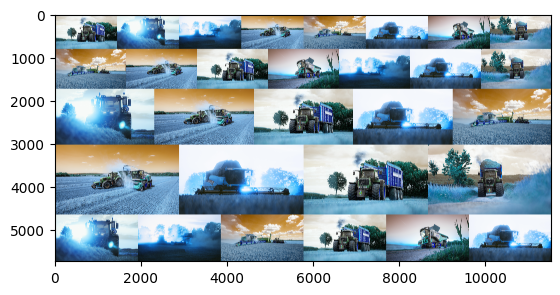

In [11]:
plt.imshow(collage)

# Implementation of Mosaic

In [140]:
#create a base grid
nrows = 16
ncols = 9

basegrid = np.zeros([nrows,ncols])

In [141]:
def drawGrid(arr):
    for rows in arr:
        print(rows)

In [142]:
drawGrid(basegrid)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
combine_cells = random.randint(1,nrows-3)
print(combine_cells)
startx = random.randint(0,nrows)
starty = random.randint(0,ncols)

In [9]:
class mos:
    def __init__(self,startx,starty,size,mosaic_id = None):
        #print("im a mosaic")
        self.startx = startx
        self.starty = starty
        self.size = size
        self.mosaic_id = None
    def __str__(self):
        #print("string")
        print("starting at x={},y={}".format(str(self.startx),str(self.starty)))
        print("ending at x={},y={}".format(str(self.startx+self.size-1),str(self.starty+self.size-1)))
        print("size is {}by{}".format(str(self.size),str(self.size)))
        return ""
    def checkSpaceOnGrid(self,grid):
        space_taken = False
        for x in range(self.size):
            x = self.startx + x
            for y in range(self.size):
                y = self.starty + y
                if grid[x][y] != 0:
                    #print("space is taken")
                    space_taken = True
                    break
                #else:
                    #print("space is still free...")
            if space_taken:
                break
        return not space_taken
    def placeOnGrid(self,grid,id):
        for x in range(self.size):
            x = self.startx + x
            for y in range(self.size):
                y = self.starty + y
                grid[x][y] = id
                self.mosaic_id = id
        return grid

                


In [10]:
def limitStartPositionOnGrid(x,y,size,nrows,ncols):
    if size == 3:
        if x > ncols:
            x = ncols
    elif size == 2:
        
    elif size == 1:
        
    else:
        x,y = x,y
    return (x,y)

IndentationError: expected an indented block after 'if' statement on line 2 (2179088753.py, line 4)

In [92]:
def getNewPosition(size,nrows,ncols):
    if size == 3:
        x = random.randint(size-1,nrows-size-1)
        y = random.randint(size-1,ncols-size-1)
    elif size == 2:
        x = random.randint(0,nrows-2)
        y = random.randint(0,ncols-2)
    elif size == 1:
        x = random.randint(0,nrows-1)
        y = random.randint(0,ncols-1)
    else:
        x = 0
        y = 0
    
    return x,y
size = 3
print(getNewPosition(size,nrows,ncols))

(3, 4)


In [164]:
id = 1
mosaic = []
number_of_failures = size_before = 0
basegrid = np.zeros([nrows,ncols])

while(id < 30):
    if len(mosaic) < 3:
        size = 3
    elif len(mosaic) < 25:
        size = 2
    else:
        size = 1
    x,y = getNewPosition(size,nrows,ncols)
    m = mos(startx=x,starty=y,size=size)
    if m.checkSpaceOnGrid(basegrid):
        basegrid = m.placeOnGrid(basegrid,id)
        id += 1
        #print(id)
        #print(m)
        mosaic.append(m)
        #print(len(mosaic))
    else:
        number_of_failures += 1
    if size_before != size:
        print("Fehlversuche: ",number_of_failures)
        print("Größe: ",size)
        number_of_failures = 0
    size_before = size
    
    if number_of_failures > 999:
        print("zu viele Fehlversuche")
        break
    
drawGrid(basegrid)
for ms in mosaic:
    print(ms.mosaic_id)

Fehlversuche:  0
Größe:  3
Fehlversuche:  1
Größe:  2
zu viele Fehlversuche
[20. 20.  0.  0.  0.  0.  0.  0.  0.]
[20. 20. 11. 11.  7.  7.  4.  4.  0.]
[21. 21. 11. 11.  7.  7.  4.  4.  0.]
[21. 21.  1.  1.  1.  0.  6.  6.  0.]
[17. 17.  1.  1.  1.  0.  6.  6.  0.]
[17. 17.  1.  1.  1.  0.  0. 18. 18.]
[22. 22.  0.  3.  3.  3.  0. 18. 18.]
[22. 22.  0.  3.  3.  3.  0.  5.  5.]
[ 0. 10. 10.  3.  3.  3.  0.  5.  5.]
[ 0. 10. 10.  0.  0. 13. 13. 12. 12.]
[ 0. 15. 15.  8.  8. 13. 13. 12. 12.]
[ 0. 15. 15.  8.  8.  2.  2.  2.  0.]
[ 0. 19. 19.  0.  0.  2.  2.  2.  0.]
[ 0. 19. 19. 16. 16.  2.  2.  2.  0.]
[ 9.  9.  0. 16. 16. 14. 14. 23. 23.]
[ 9.  9.  0.  0.  0. 14. 14. 23. 23.]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


1.7777777777777777
360 202
uint8


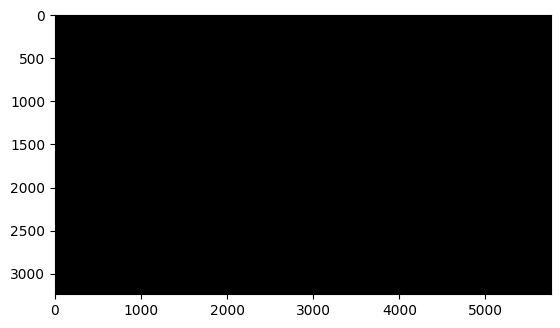

In [201]:
collage_width = 1920*3
collage_height = 1080*3
w_h_factor = collage_width/collage_height
print(w_h_factor)
psm_width = int(collage_width//nrows) #pixel size mosaic
psm_height = int(psm_width//w_h_factor)
print(psm_width,psm_height)

collage = np.zeros([collage_height,collage_width,3],dtype='uint8')
print(collage.dtype)
plt.imshow(collage)

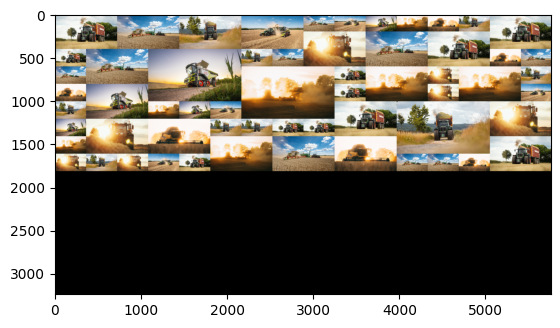

In [204]:
plt.imshow(cv2.cvtColor(collage,cv2.COLOR_BGR2RGB))

In [181]:
print(mosaic[22])
print(mosaic[22].startx*psm_width)
print(mosaic[22].startx*psm_width + (ms.size)*psm_width)
print(mosaic[22].starty*psm_height)
print(mosaic[22].starty*psm_height + (ms.size)*psm_height)


starting at x=14,y=7
ending at x=15,y=8
size is 2by2

3360
3840
945
1215


606 1080
(606, 1080, 3)
606 1080
(606, 1080, 3)
606 1080
(606, 1080, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)
404 720
(404, 720, 3)


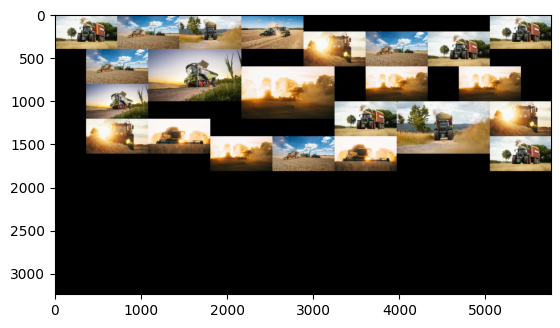

In [202]:
images = glob.glob("data/*JPG")
for ms in mosaic:
    img = random.sample(images, 1)
    #print(img)
    img = cv2.resize(cv2.imread(img[0]),(psm_width*(ms.size),psm_height*(ms.size)))
    #cv2.imshow("img",img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #plt.imshow(img)
    #print(ms)
    x1 = ms.startx*psm_width
    y1 = ms.starty*psm_height
    x2 = ms.startx*psm_width + (ms.size)*psm_width
    y2 = ms.starty*psm_height + (ms.size)*psm_height

    print(y2-y1,x2-x1)
    print(img.shape)
    #print(img.dtype)
    #collage[y1:y2,x1:x2,0] = img[...,0]
    collage[y1:y2,x1:x2] = img
plt.imshow(cv2.cvtColor(collage,cv2.COLOR_BGR2RGB))

In [203]:
for row_ind, row in enumerate(basegrid):
    for col_ind, col in enumerate(row):
        if basegrid[row_ind,col_ind]==0:
                img = random.sample(images, 1)
                #print(img)
                img = cv2.resize(cv2.imread(img[0]),(psm_width,psm_height))
                #cv2.imshow("img",img)
                #cv2.waitKey(0)
                #cv2.destroyAllWindows()
                #plt.imshow(img)
                #print(ms)
                x1 = row_ind*psm_width
                y1 = col_ind*psm_height
                x2 = row_ind*psm_width + psm_width
                y2 = col_ind*psm_height + psm_height

                print(y2-y1,x2-x1)
                print(img.shape)
                #print(img.dtype)
                #collage[y1:y2,x1:x2,0] = img[...,0]
                collage[y1:y2,x1:x2] = img

202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)
202 360
(202, 360, 3)


In [207]:
cropped_collage = np.copy(collage)
cropped_collage = cropped_collage[0:1800,...]

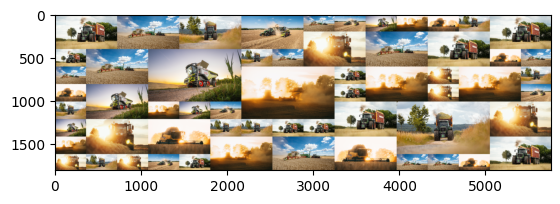

In [208]:
plt.imshow(cv2.cvtColor(cropped_collage,cv2.COLOR_BGR2RGB))
#plt.imshow(cropped_collage)

In [210]:
cv2.imwrite("cropped_collage.jpg",cropped_collage)

True